# Assignment 1

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
xlim = 1000 #km
zlim = 30 #km
dx = 10 #km
dz = 0.001 #km

In [3]:
pt = 2 #kPa - dry hydrostatic pressure at the top
eta_c = 0.3 # terrain-following hydrostatic-pressure vertical coordinate

In [4]:
# lets make a mesh of x and z to do the calcs with
xkm = np.arange(0,xlim+dx,dx)
zkm = np.arange(0,zlim+dz,dz)

X, Z = np.meshgrid(xkm, zkm)

In [5]:
#topography
ground = np.zeros(len(xkm))
for i in range(len(xkm)):
    if xkm[i]>250 and xkm[i]<750:
        ground[i] = 1 + (1)*math.cos( 2*(math.pi)*(xkm[i]-500) / 500)

In [6]:
# mean sea-level pressure
Pmsl = 95 + 0.01*xkm #kPa

In [7]:
#temperature mesh
# for heights less than and equal to 12 km
Tlow = (40 - 0.08*X[:12001,:])  -  6.5*Z[:12001,:] + 273 #Kelvin
Thigh = (40 - 0.08*X[12001:,:])  -  6.5*12 + 273 #Kelvin

T = np.concatenate((Tlow,Thigh))

In [8]:
# Pressure as a function of height
P = np.zeros(np.shape(X))
P[0,:] = Pmsl
a = 0.0293

for i in range(len(xkm)):
    for j in range(len(zkm)-1):
        P[j+1,i] = P[j,i] * math.e**(-dz/(a*T[j+1,i]))
        
# I believe that this give P = pi = pd (hydrostatic component of the pressure of dry air)

## Question 1
###  On an x-z graph, plot the altitudes (km) of the following isobaric surfaces:100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 5, 2 kPa.On the same plot, plot the altitude of Zground. 

Text(0.5, 0, 'X level [km]')

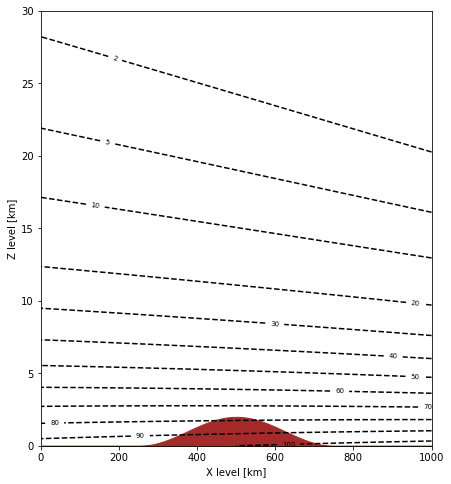

In [87]:
fig, ax = plt.subplots(1,1, figsize=(7,8))

CS = ax.contour(X,Z,P,levels=[2,5,10,20,30,40,50,60,70,80,90,100],colors='k',linestyles='dashed')
ax.clabel(CS, inline=1, fontsize=7)

ax.fill_between(xkm,ground,0,color='brown');
ax.set_ylabel('Z level [km]')
ax.set_xlabel('X level [km]')

## Question 2
### Interpolate to find the Psurface (kPa) pressure at Zground. 

In [18]:
Pground = np.zeros(len(ground))

for i in range(len(ground)):
    inH = np.where(zkm-ground[i] > 0, zkm-ground[i], np.inf).argmin()
    inL = inH-1
    
    Pground[i] = np.interp(ground[i], [zkm[inL],zkm[inH]], [P[inL,i],P[inH,i]])

In [19]:
data = {'x, (km)':xkm, 'Zground, (km)':ground, 'Psfc, (kPa)':Pground}

q2 = pd.DataFrame(data)
q2[25:76]

,"x, (km)","Zground, (km)","Psfc, (kPa)"
25,250,0.000000,97.500000
26,260,0.007885,97.510141
27,270,0.031417,97.341030
28,280,0.070224,96.996079
29,290,0.123693,96.482226
30,300,0.190983,95.809740
31,310,0.271031,94.991934
32,320,0.362576,94.044787
33,330,0.464173,92.986510
34,340,0.574221,91.837064


## Question 3
### Create a new P-x graph, on which you plot lines of constant eta.

In [72]:
c4

-3.790087463556852

In [31]:
eta_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1]

In [68]:
# calc all the fun lil c boys
c1 = (2*eta_c**2)/(1-eta_c)**3
c2 = (-eta_c*(4+eta_c + eta_c**2))/(1-eta_c)**3
c3 = (2*(1+eta_c +eta_c**2))/(1-eta_c)**3
c4 = -(1+eta_c)/(1-eta_c)**3

In [69]:
# B as a function of the eta's that we care about 
# B = np.zeros(len(eta))
# for i in range(len(eta)):
#     if eta[i] >= eta_c:
#         B[i] = c1+c2*eta[i]+c3*eta[i]**2+c4*eta[i]**3

In [83]:
# bc the pd function is a polynomial use root findder to solve for eta
ps = Pground
po = P[0,:] #kPa
pt = 2 #kPa
pd = P
eta = np.zeros(pd.shape)

for i in range(pd.shape[1]):
    for j in range(pd.shape[0]):

        coeff = [c4*(ps[i]-po[i]),c3*(ps[i]-po[i]),c2*(ps[i]-po[i])+(po[i]-pt),c1*(ps[i]-po[i])+pt-pd[j,i]]
        roots = np.roots(coeff)
        
        if [n.real for n in roots if n.imag == 0][0] >= 0.3:
            eta[j,i] = [n.real for n in roots if n.imag == 0][0]
        else:
            eta[j,i] = -(pt-pd[j,i])/(po[i]-pt)

Text(0.5, 0, 'X level [km]')

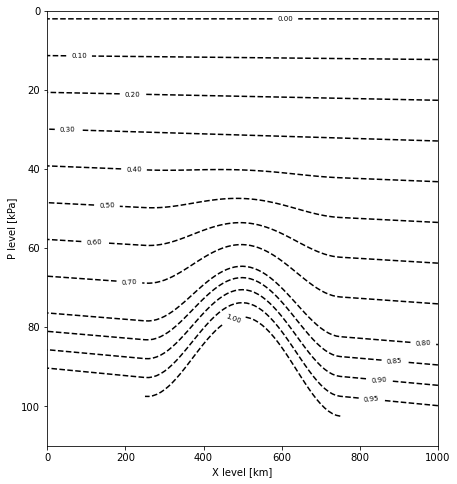

In [88]:
fig, ax = plt.subplots(1,1, figsize=(7,8))

CS = ax.contour(X,P,eta,levels=eta_levels,colors='k',linestyles='dashed')
ax.clabel(CS, inline=1, fontsize=7)

# ax.plot(xkm,ground,color='brown')
# ax.fill_between(xkm,ground,0,color='brown');
ax.set_ylim([110,0])
ax.set_ylabel('P level [kPa]')
ax.set_xlabel('X level [km]')

## Question 4
###  Create a new z-x graph, on which you plot the z altitudes of the constant eta lines for the same eta values as in part (3) above.

In [85]:
z_eta = np.zeros(np.shape(P))
z_eta[0,:] = 0
a = 0.0293

for i in range(len(xkm)):
    for j in range(len(zkm)-1):
        z_eta[j+1,i] = z_eta[j,i] - a*T[j+1,i]*math.log(P[j+1,i]/P[j,i])

Text(0.5, 0, 'X level [km]')

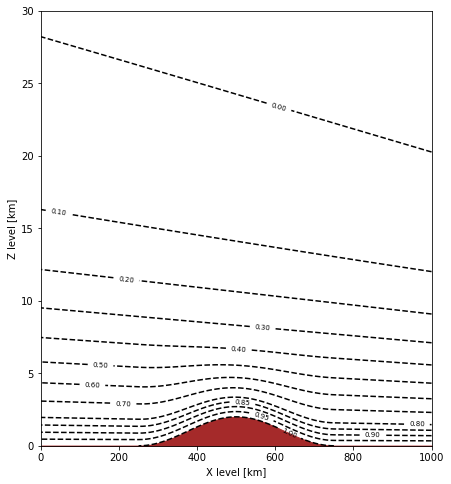

In [89]:
fig, ax = plt.subplots(1,1, figsize=(7,8))

CS = ax.contour(X,Z,eta,levels=eta_levels,colors='k',linestyles='dashed')
ax.clabel(CS, inline=1, fontsize=7)

ax.fill_between(xkm,ground,0,color='brown');
ax.set_ylabel('Z level [km]')
ax.set_xlabel('X level [km]')